In [1]:
# place all the points on the map of last-seen-nonstat, excluding itself
# folds information actually not necessary
import os
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
print(os.listdir("../input/eyn-original"))
x_min, x_max = -1., 1.
y_min, y_max = -.3, .3

['train_data.npy', 'trn_index_list.npy', 'custom.css', 'val_index_list.npy', '__results__.html', 'train_targets_inside.npy', 'submission.csv', 'train_targets.npy', 'test_ids.npy', '__output__.json', 'test_data.npy', '__notebook__.ipynb']


In [2]:
# to load
df_train_cluster = pd.read_pickle("../input/eyn-pre-cluster-unif/df_train_cluster.pickle")
df_test_cluster = pd.read_pickle("../input/eyn-pre-cluster-unif/df_test_cluster.pickle")
print(df_train_cluster.shape, df_test_cluster.shape)

(2815323, 40) (703815, 40)


In [3]:
df_train_cluster.head()

at0       ad0  bt0       bd0    ...     at9       ad9  bt9       bd9
seq traj                                  ...                                 
0   0     NaN       NaN  NaN       NaN    ...     0.0  0.004642  NaN       NaN
    1     0.0  0.000724  0.0  0.000724    ...     0.0  0.002164  0.0  0.002164
    2     0.0  0.000145  0.0  0.002898    ...     0.0  0.000336  0.0  0.008035
    3     0.0  0.001014  0.0  0.000649    ...     0.0  0.002303  0.0  0.002017
    4     0.0  0.016330  0.0  0.000426    ...     0.0  0.032572  0.0  0.005448

[5 rows x 40 columns]

In [4]:
df_train_cluster_values = df_train_cluster.values
df_test_cluster_values = df_test_cluster.values
df_original_columns = df_train_cluster.columns
print(df_train_cluster_values.shape, df_test_cluster_values.shape)

(2815323, 40) (703815, 40)


In [5]:
QUERY_SIZE = df_train_cluster_values[:,0::4].shape[1]

df_train_entry_target = df_train_cluster_values[:,0::4]
df_train_exit_target = df_train_cluster_values[:,2::4]
df_train_entry_dist = df_train_cluster_values[:,1::4]
df_train_exit_dist = df_train_cluster_values[:,3::4]
print(df_train_entry_target.shape, df_train_exit_target.shape, 
      df_train_entry_dist.shape, df_train_exit_dist.shape)

df_test_entry_target = df_test_cluster_values[:,0::4]
df_test_exit_target = df_test_cluster_values[:,2::4]
df_test_entry_dist = df_test_cluster_values[:,1::4]
df_test_exit_dist = df_test_cluster_values[:,3::4]
print(df_test_entry_target.shape, df_test_exit_target.shape, 
      df_test_entry_dist.shape, df_test_exit_dist.shape)

(2815323, 10) (2815323, 10) (2815323, 10) (2815323, 10)
(703815, 10) (703815, 10) (703815, 10) (703815, 10)


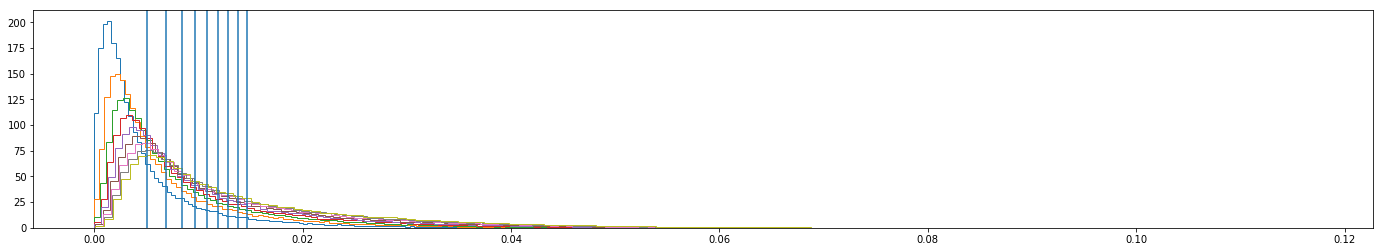

In [6]:
plt.figure(figsize=(24,4))
for i in range(1,10):
    plt.hist(list(df_train_entry_dist[::21,i]), density=True, bins='scott', histtype='step')
    plt.axvline(x=np.mean(df_train_entry_dist[::21,i]))
plt.show()

In [7]:
DECAY_CONST = 0.001
df_train_entry_dist_w = np.exp(-np.array(df_train_entry_dist, dtype=np.float32) / 0.001)
df_train_exit_dist_w = np.exp(-np.array(df_train_exit_dist, dtype=np.float32) / 0.001)
df_test_entry_dist_w = np.exp(-np.array(df_test_entry_dist, dtype=np.float32) / 0.001)
df_test_exit_dist_w = np.exp(-np.array(df_test_exit_dist, dtype=np.float32) / 0.001)

In [8]:
df_train_entry_w_dot = df_train_entry_target-0.5 * df_train_entry_dist_w
df_train_exit_w_dot = df_train_exit_target-0.5 * df_train_entry_dist_w
df_test_entry_w_dot = df_test_entry_target-0.5 * df_test_entry_dist_w
df_test_exit_w_dot = df_test_exit_target-0.5 * df_test_entry_dist_w
print(df_train_entry_w_dot.shape, df_train_exit_w_dot.shape, 
      df_test_entry_w_dot.shape, df_test_exit_w_dot.shape)

(2815323, 10) (2815323, 10) (703815, 10) (703815, 10)


In [9]:
entry_col_names_weighted = ["c{}".format(i) for i in range(QUERY_SIZE)]
exit_col_names_weighted = ["d{}".format(i) for i in range(QUERY_SIZE)]

for i,(a,b) in enumerate(zip(entry_col_names_weighted, exit_col_names_weighted)):
    df_train_cluster[a] = df_train_entry_w_dot[:,i].ravel()
    df_train_cluster[b] = df_train_exit_w_dot[:,i].ravel()
    df_test_cluster[a] = df_test_entry_w_dot[:,i].ravel()
    df_test_cluster[b] = df_test_exit_w_dot[:,i].ravel()

In [10]:
df_train_cluster = df_train_cluster.drop(columns=df_original_columns)
df_test_cluster = df_test_cluster.drop(columns=df_original_columns)

In [11]:
df_train_cluster.to_pickle("df_train_cluster_w.pickle")
df_test_cluster.to_pickle("df_test_cluster_w.pickle")

In [12]:
%reset -sf

In [13]:
# place all the points on the map of last-seen-nonstat, excluding itself
# folds information actually not necessary
import os
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
print(os.listdir("../input/eyn-original"))
x_min, x_max = -1., 1.
y_min, y_max = -.3, .3

['train_data.npy', 'trn_index_list.npy', 'custom.css', 'val_index_list.npy', '__results__.html', 'train_targets_inside.npy', 'submission.csv', 'train_targets.npy', 'test_ids.npy', '__output__.json', 'test_data.npy', '__notebook__.ipynb']


In [14]:
# try loading
df_train_cluster_w = pd.read_pickle("df_train_cluster_w.pickle")
df_test_cluster_w = pd.read_pickle("df_test_cluster_w.pickle")
print(df_train_cluster_w.shape, df_test_cluster_w.shape)
df_train_cluster_w.head()

(2815323, 20) (703815, 20)


c0           d0     ...                c9           d9
seq traj                               ...                               
0   0             NaN          NaN     ...       -0.00481764          NaN
    1       -0.242493    -0.242493     ...        -0.0574125   -0.0574125
    2       -0.432722    -0.432722     ...          -0.35735     -0.35735
    3       -0.181469    -0.181469     ...        -0.0499834   -0.0499834
    4    -4.04356e-08 -4.04356e-08     ...      -3.57428e-15 -3.57428e-15

[5 rows x 20 columns]

In [15]:
df_train_cluster_w_values = df_train_cluster_w.values
df_test_cluster_w_values = df_test_cluster_w.values
df_original_columns = df_test_cluster_w.columns

In [16]:
df_train_cluster_w_sum_entry = np.sum(df_train_cluster_w_values[:,0::2], axis=1)
df_train_cluster_w_sum_exit = np.sum(df_train_cluster_w_values[:,1::2], axis=1)
df_test_cluster_w_sum_entry = np.sum(df_test_cluster_w_values[:,0::2], axis=1)
df_test_cluster_w_sum_exit = np.sum(df_test_cluster_w_values[:,1::2], axis=1)

df_train_cluster_w_sum_entry[::21] = np.nansum(df_train_cluster_w_values[::21,0::2], axis=1)
df_test_cluster_w_sum_entry[::21] = np.nansum(df_test_cluster_w_values[::21,0::2], axis=1)

In [17]:
df_train_cluster_w["sum_entry"] = df_train_cluster_w_sum_entry
df_train_cluster_w["sum_exit"] = df_train_cluster_w_sum_exit
df_test_cluster_w["sum_entry"] = df_test_cluster_w_sum_entry
df_test_cluster_w["sum_exit"] = df_test_cluster_w_sum_exit

In [18]:
df_train_cluster_w.head(7)

c0           d0     ...         sum_entry     sum_exit
seq traj                               ...                               
0   0             NaN          NaN     ...         -0.349623          NaN
    1       -0.242493    -0.242493     ...          -1.31185     -1.31185
    2       -0.432722    -0.432722     ...          -4.00813     -4.00813
    3       -0.181469    -0.181469     ...         -0.979705    -0.979705
    4    -4.04356e-08 -4.04356e-08     ...      -4.05298e-08 -4.05298e-08
    5       -0.155519    -0.155519     ...         -0.160936    -0.160936
    6             NaN          NaN     ...               NaN          NaN

[7 rows x 22 columns]

In [19]:
df_train_cluster_w = df_train_cluster_w.drop(columns=df_original_columns)
df_test_cluster_w = df_test_cluster_w.drop(columns=df_original_columns)

In [20]:
df_train_cluster_w.to_pickle("df_train_cluster_s.pickle")
df_test_cluster_w.to_pickle("df_test_cluster_s.pickle")

In [21]:
df_test_cluster_w.head(7)

sum_entry   sum_exit
seq traj                       
0   0    -0.00162238        NaN
    1     -0.0108394 -0.0108394
    2        4.46018  -0.539816
    3     -0.0479094 -0.0479094
    4       -1.03044   -1.03044
    5            NaN        NaN
    6            NaN        NaN